In [2]:
from multiprocessing.spawn import import_main_path
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
from tqdm import tqdm
import time

In [3]:
def crop (in_img):
    # import cv2
    zmensene = False #!!! můžou fungovat lépe aneb když programátor nepřizná, že mu to prostě nefunguje
    if zmensene == True:
        cropped = in_img
        # cropped = cv2.resize(source, (800, 600))                     # POZOR, ROZMĚRY SE NEPOČÍTAJÍ
        # cropped = cropped[100 : 540, 70 : 700]        #crop malých, mnou zmenšeny
    else:
        # cropped = source[1480 : 8000, 410 : right]        #crop velkých, originálů
        cropped = in_img[1480 : 8000, 410 : 10200]        #crop velkých, originálů

        # zamalování loga UP
        cropped = cv2.rectangle(cropped, (8800, 0), (10290, 1409), (0, 0, 0), -1)
        cropped = cv2.rectangle(cropped, (0, 0), (1409, 1409), (0, 0, 0), -1)
    # cropped = source

    return cropped

In [4]:
def bake(bake_img, hard = None):
    # global bake_img
    if hard == True:
        cv2.imwrite("temp.png", bake_img)
        return cv2.imread("temp.png")
    else:
        return bake_img.astype(np.uint8)

In [5]:
show_imgs = False
os.system('cls')

0

In [6]:
# najde všechny soubory v IN složce, aby se mohl loopnout
inputs_jpg = os.listdir("in/")
inputs = []
for a in inputs_jpg:
    l = len(a)
    short = a[:l - 4]
    inputs.append(short)
# vynechávám img_num, protože ho nepotřebuji
if show_imgs == True:
    cv2.namedWindow("win", cv2.WINDOW_AUTOSIZE)

# Další by mělo být v for inputs
ale protože jupyter(a rozhodně ne že já ho neumím): neloopuju se, ale jedu jenom 1 obrázek

In [7]:
# actual_img = "2022_02_23_12_45_14"   
actual_img = "2022_02_25_10_57_13"

In [8]:
# načte BW obrázek
bw = cv2.imread("in/{}.jpg".format(actual_img), 0).astype("float64") # 0 protože chci černobílý obrázek (pro krok úprava)
# bw = cv2.cvtColor(source, cv2.COLOR_RGB2GRAY)

# zamalování loga UP
bw = cv2.rectangle(bw, (10000, 1211), (11800, 1930), (0), -1)
bw = cv2.rectangle(bw, (0, 1100), (860, 2700), (0), -1)

cv2.imwrite("debug/1.BW/{}.png".format(actual_img), bw)

if show_imgs == True:
    frame = cv2.resize(bw, (979, 652))
    cv2.imshow('win', frame)
    cv2.waitKey(200) 

In [9]:
def thresholdit (source, times):
    suma = 0
    h, w = source.shape[:2]

    for a in source:
        for b in a:
            suma = suma + b
    avg = suma / (h*w)

    much = avg * times

    _, th = cv2.threshold(source, much, 255, cv2.THRESH_BINARY)
    return th

100%|██████████| 8702/8702 [00:16<00:00, 536.26it/s]


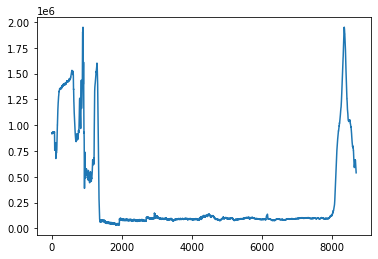

324101.0 1349
352777.0 8103


In [10]:
# sečte řádky, cropne
# mám 8702 řádků, a v nich  11630 sloupců
# ŘÁDKY - spočítám první součet, potom najdu údolí

suma_radek = []

# sečtu řádky
for radek in tqdm(bw):
    suma = 0
    for num in radek:
        suma += num
    suma_radek.append(suma)

# najdu si výšku obrázku
h, w = bw.shape[:2]
range_radku = range(h)


# plotnu to
plt.plot(range_radku, suma_radek)
plt.show()


# NAJDU CROP zvrchu a zespodu


# idea zatímhle je, že sopočítám průměr, a když je toto pod průměrem, 
average = 0
lpnb = 0


# for num in suma_radek:
#     lpnb += 1
#     average += num
# average /= lpnb
# print(average)
average = 350000

lpnb = 0
inside = False
for suma in suma_radek:
    lpnb += 1
    if suma < average and inside == False:
        inside = not inside
        ctop = lpnb
        print(suma, lpnb)
    if suma > average and inside == True:
        cbot = lpnb
        inside = not inside
        print(suma, lpnb)

100%|██████████| 11630/11630 [00:42<00:00, 276.24it/s]


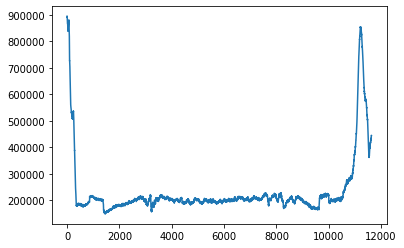

324101.0 1349
352777.0 8103


In [11]:
# # sečte sloupce, cropne
# mám 8702 řádků, a v nich  11630 sloupců
# SLOUPCE
suma_sloupce = []

h, w = bw.shape[:2]
range_sloupce = range(w)

for sloupec in tqdm(range(w)):
    # print(sloupec)
    suma = 0
    for radek in range(h):
        suma += bw[radek, sloupec]
    suma_sloupce.append(suma)
    

# Function to plot


plt.plot(range_sloupce, suma_sloupce)
plt.show()



average = 0
lpnb = 0

average = 350000

lpnb = 0
inside = False
for suma in suma_radek:
    lpnb += 1
    if suma < average and inside == False:
        inside = not inside
        ctop = lpnb
        print(suma, lpnb)
    if suma > average and inside == True:
        cbot = lpnb
        inside = not inside
        print(suma, lpnb)

In [12]:
# najde left a right crop obrázku na černou


average = 0
lpnb = 0

# for num in suma_sloupce:
#     lpnb += 1
#     average += num
# average /= lpnb
# print(average)
average = 350000

lpnb = 0
inside = False
temps = []

for suma in suma_sloupce:
    lpnb += 1
    if suma < average and inside == False:
        inside = not inside
        # cleft = lpnb
        temps.append(lpnb)
        print(suma, lpnb)
    if suma > average and inside == True:
        inside = not inside
        # crig = lpnb
        temps.append(lpnb)
        print(suma, lpnb)
print()
crig = max(temps) 
cleft = min(temps) 

print(cleft, crig)


349519.0 299
352660.0 10961
349076.0 10962
351449.0 10967

299 10967


In [13]:
# cropne obrázky podle předchozích kroků
margin = 40
crp = bw[int(ctop+margin) : int(cbot-margin), int(cleft+margin) : int(crig-margin)]

print(crp)

cv2.imwrite("debug/2.cropped/{}.png".format(actual_img), crp)

[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [66. 67. 68. ... 39. 44. 48.]
 [64. 66. 67. ... 40. 45. 48.]
 [64. 66. 67. ... 42. 45. 48.]]


True

100%|██████████| 834/834 [00:00<00:00, 277821.42it/s]


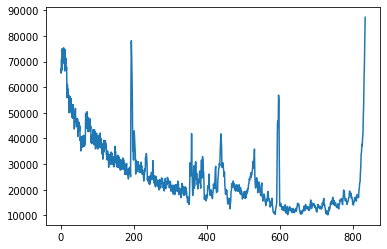

In [14]:
# tentokrát to udělám pro croplej img
# ŘÁDKY
suma_radek = []

for radek in tqdm(crp):
    suma = 0
    for num in radek:
        suma += num
    suma_radek.append(suma)

h, w = crp.shape[:2]
range_radku = range(h//8)

avg_suma_r = []
for num in tqdm(range_radku):
    num *= 8
    suma = suma_radek[num] + suma_radek[num + 1] + suma_radek[num + 2] + suma_radek[num + 3] + suma_radek[num + 4] + suma_radek[num + 5] + suma_radek[num + 6] + suma_radek[num + 7]
    suma /= 8
    avg_suma_r.append(suma)

# Function to plot
plt.plot(range_radku, avg_suma_r)
  
# function to show the plot
plt.show()

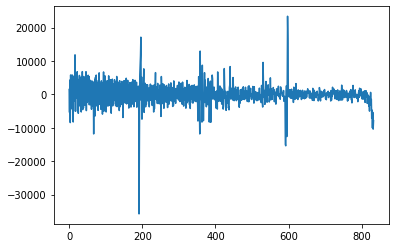

In [15]:
# z součtů řádků udělá derivaci - velikost změny na jeeednom
radek_deriv = []
h, w = crp.shape[:2]
range_radku = range(h//8 - 1)

# for num in tqdm(avg_suma_r):
for lpnb in range_radku:
    radek_deriv.append(avg_suma_r[lpnb] - avg_suma_r[lpnb+1])



# Function to plot
plt.plot(range_radku, radek_deriv)
  
# function to show the plot
plt.show()

In [31]:
avg = sum(radek_deriv)/ len(radek_deriv)
for multipl in tqdm(range(0, 500, 10)):
    out = []
    for a in range(len(radek_deriv)):
        if radek_deriv[a] > avg * multipl:
            out.append(a * 8) # 8 protože jsem předtím dělal průměr z 8
    if len(out) < 10:
        break
# print(out)
topc = min(out)
botc = max(out)

print(topc, botc)

100%|██████████| 50/50 [00:00<00:00, 3128.07it/s]

0 6656


100%|██████████| 1323/1323 [00:00<00:00, 441242.38it/s]


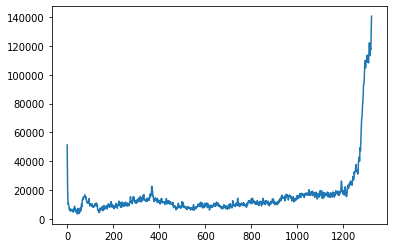

In [32]:
# tentokrát to udělám pro croplej img
# sloupce
suma_sloupce = []

h, w = crp.shape[:2]
range_sloupce = range(w)

for sloupec in tqdm(range(w)):
    # print(sloupec)
    suma = 0
    for radek in range(h):
        suma += crp[radek, sloupec]
    suma_sloupce.append(suma)

h, w = crp.shape[:2]
# range_sloupce = range(w)
range_sloupce = range(w//8)

avg_suma_s = []
for num in tqdm(range_sloupce):
    num *= 8
    suma = suma_sloupce[num] + suma_sloupce[num + 1] + suma_sloupce[num + 2] + suma_sloupce[num + 3] + suma_sloupce[num + 4] + suma_sloupce[num + 5] + suma_sloupce[num + 6] + suma_sloupce[num + 7]
    suma /= 8
    avg_suma_s.append(suma)

# Function to plot
plt.plot(range_sloupce, avg_suma_s)
# plt.plot(range_sloupce, suma_sloupce)
# print(avg_suma_s)
  
# function to show the plot
plt.show()

1323
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
2

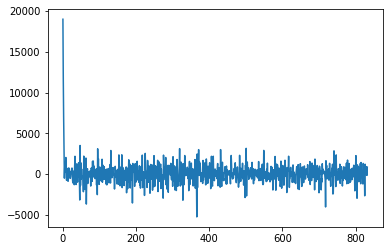

In [33]:
# z součtů řádků udělá derivaci - velikost změny na jeeednom
sloup_deriv = []
h, w = crp.shape[:2]
range_sloup = range(h//8 - 1)
print(len(avg_suma_s))
# for num in tqdm(avg_suma_r):
for lpnb in range_sloup:
    print(lpnb)
    sloup_deriv.append(avg_suma_s[lpnb] - avg_suma_s[lpnb+1])




# Function to plot
plt.plot(range_sloup, sloup_deriv)
  
# function to show the plot
plt.show()